In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
raw_data = pd.read_csv('/kaggle/input/cryptocurrency-historical-prices-top-100-2025/Crypto_historical_data.csv')
print(raw_data.info())
print("raw_data.shape:",raw_data.shape)
display(raw_data.describe(include='all').T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347397 entries, 0 to 347396
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    347397 non-null  object 
 1   Open    346051 non-null  float64
 2   High    346051 non-null  float64
 3   Low     346051 non-null  float64
 4   Close   347397 non-null  float64
 5   Volume  347397 non-null  int64  
 6   ticker  347397 non-null  object 
 7   name    347397 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.2+ MB
None
df.shape: (347397, 8)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,347397,4076,2025-10-30 00:00:00+00:00,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,346051.0,NaN,NaN,NaN,1697.669423,9963.378842,0.0,0.123912,1.065675,39.138218,125813.125
High,346051.0,NaN,NaN,NaN,1734.770275,10162.378645,0.0,0.130336,1.105603,40.994146,236493.171875
Low,346051.0,NaN,NaN,NaN,1661.844454,9776.305198,-1.217554,0.117582,1.021598,37.355045,123230.890625
Close,347397.0,NaN,NaN,NaN,1692.490225,9952.035812,0.0,0.11853,1.047913,38.28661,125813.125
Volume,347397.0,NaN,NaN,NaN,2530646059.631298,273806053233.03833,0.0,817506.0,23525780.0,206973162.0,83252070566791.0
ticker,347397,217,WETH-USD,17160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,347397,229,Litecoin,4076,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print('Unique tickers:', raw_data['ticker'].nunique())
print('Tickers:', raw_data['ticker'].unique().tolist())

Unique tickers: 217
Tickers: ['SOL-USD', 'BNB-USD', 'DOGE-USD', 'STETH-USD', 'ETH-USD', 'TRX-USD', 'USDC-USD', 'XRP-USD', 'USDT-USD', 'BTC-USD', 'ADA-USD', 'WBTC-USD', 'WBETH-USD', 'WSTETH-USD', 'WBT-USD', 'HYPE-USD', 'BCH-USD', 'LINK-USD', 'WEETH-USD', 'XLM-USD', 'CBBTC-USD', 'USDE-USD', 'USDS-USD', 'HBAR-USD', 'WETH-USD', 'AVAX-USD', 'LEO-USD', 'ZEC-USD', 'LTC-USD', 'SUI-USD', 'DOT-USD', 'SHIB-USD', 'XMR-USD', 'SUSDE-USD', 'TON-USD', 'DAI-USD', 'MNT-USD', 'UNI-USD', 'CC-USD', 'CRO-USD', 'M-USD', 'USDT0-USD', 'WLFI-USD', 'ICP-USD', 'PYUSD-USD', 'USD1-USD', 'BGB-USD', 'AAVE-USD', 'NEAR-USD', 'PEPE-USD', 'OKB-USD', 'BUIDL-USD', 'ASTER-USD', 'ENA-USD', 'ONDO-USD', 'ETC-USD', 'JLP-USD', 'XAUT-USD', 'APT-USD', 'USDF-USD', 'JITOSOL-USD', 'POL-USD', 'PI-USD', 'USDTB-USD', 'HTX-USD', 'KCS-USD', 'ALGO-USD', 'WLD-USD', 'HASH-USD', 'FIL-USD', 'RETH-USD', 'TRUMP-USD', 'ARB-USD', 'BNSOL-USD', 'VET-USD', 'ATOM-USD', 'GT-USD', 'PAXG-USD', 'SYRUPUSDT-USD', 'BFUSD-USD', 'IP-USD', 'KAS-USD', 'QNT-USD',

* Possible approaches :
    1.  select one or few tickers that have long history with plenty of data
        * possible challenges:
            -   less data to work with.
            -   overfitting .
    2.  use all of them to make a general purpose predicter
        * possible challenges:
            -   class imbalance as old coins have more history and data
            -   expensive coins and cheap coins have different transactions rate 
            -   need complex preprocessing

## APPROACH ONE 

In [20]:
# Count
_counts = raw_data["ticker"].value_counts()
top_ten_coins = _counts[:10]
top_ten_coins

ticker
WETH-USD    17160
USDT-USD     5854
DOGE-USD     5854
USDC-USD     5188
WBTC-USD     4960
DAI-USD      4368
SOL-USD      4088
LTC-USD      4076
BTC-USD      4076
KCS-USD      2927
Name: count, dtype: int64

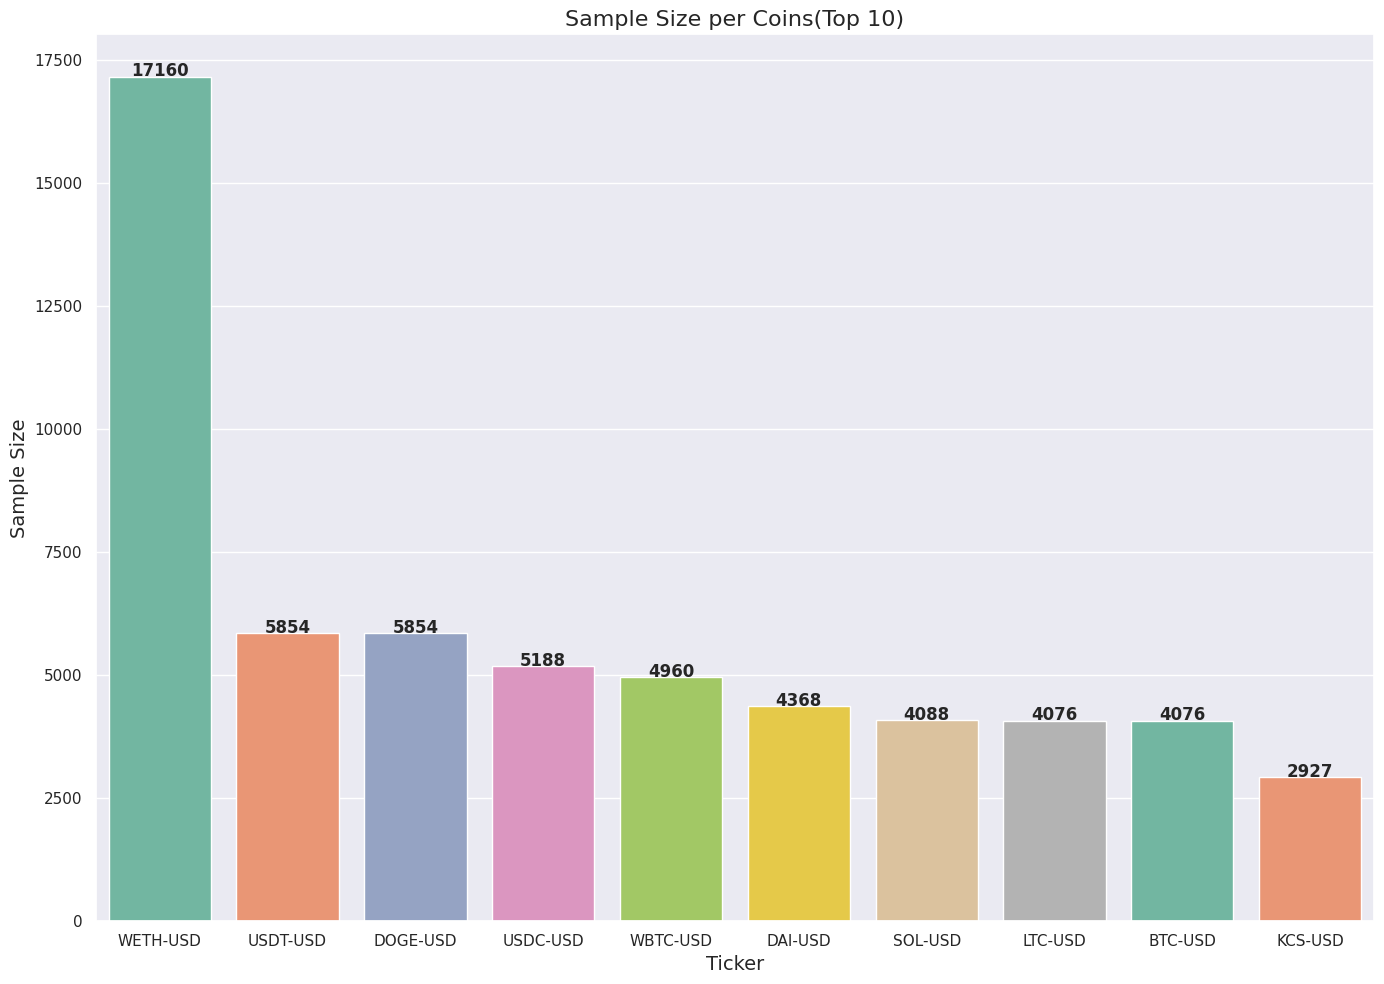

In [21]:
# Set style and color palette
palette = sns.color_palette("Set2")
sns.set_style("darkgrid")

# Create figure
plt.figure(figsize=(14, 10))
sns.barplot(x=top_ten_coins.index, y=top_ten_coins.values, palette=palette)

# Add labels
plt.xlabel("Ticker", fontsize=14)
plt.ylabel("Sample Size", fontsize=14)
plt.title("Sample Size per Coins(Top 10)", fontsize=16)

# Show sample size on bars
for i, v in enumerate(top_ten_coins.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

In [22]:
#Changing Date to pandas datetime obj and creating dataset subset
raw_data['Date'] = pd.to_datetime(raw_data['Date'])

top_ten_list =  top_ten_coins.index.tolist()
print(top_ten_list)

coin_df = raw_data[raw_data['ticker'].isin(top_ten_list)].copy()
#coin_df = coin_df.sort_values(by='Date')
coin_df.set_index('Date', inplace=True)
# coin_df.reset_index()
print(f"\nNew subset DataFrame shape: { coin_df.shape}")

['WETH-USD', 'USDT-USD', 'DOGE-USD', 'USDC-USD', 'WBTC-USD', 'DAI-USD', 'SOL-USD', 'LTC-USD', 'BTC-USD', 'KCS-USD']

New subset DataFrame shape: (58551, 7)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


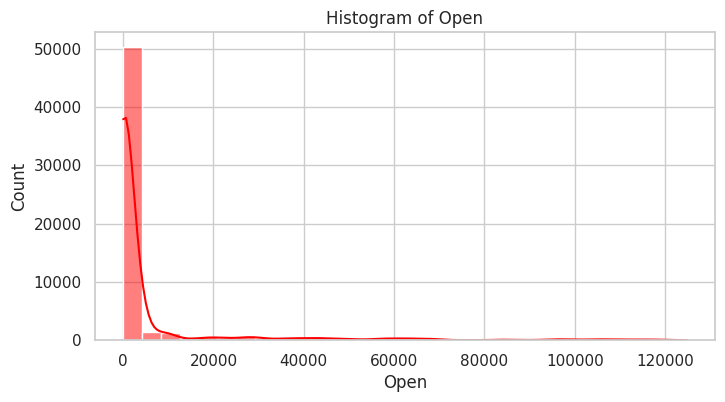

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


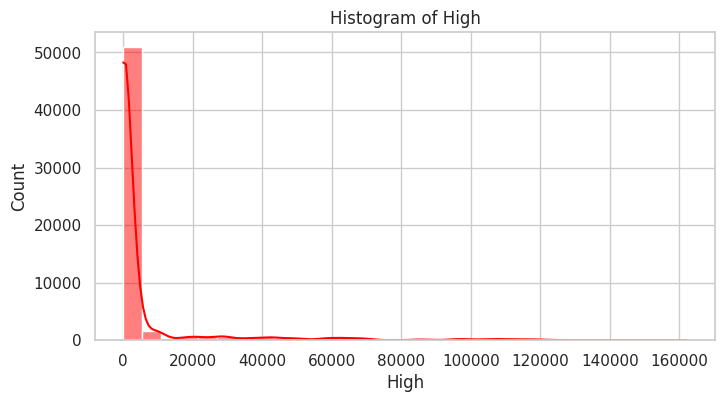

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


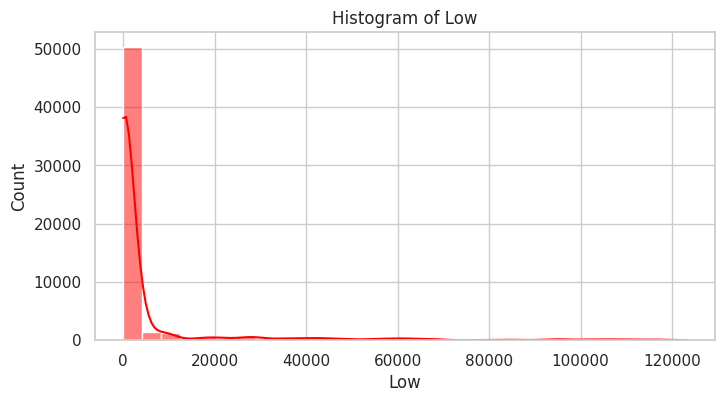

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


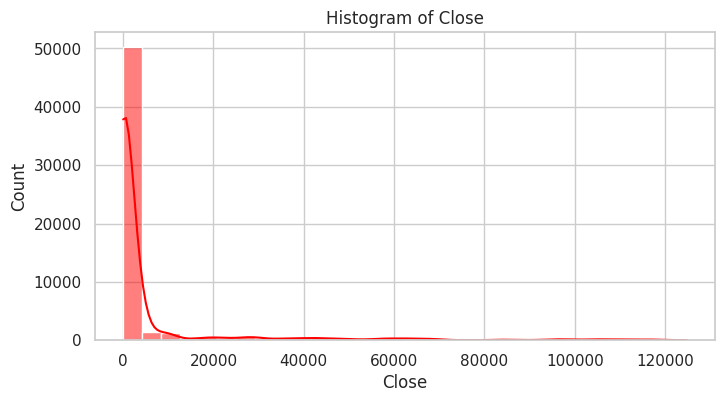

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


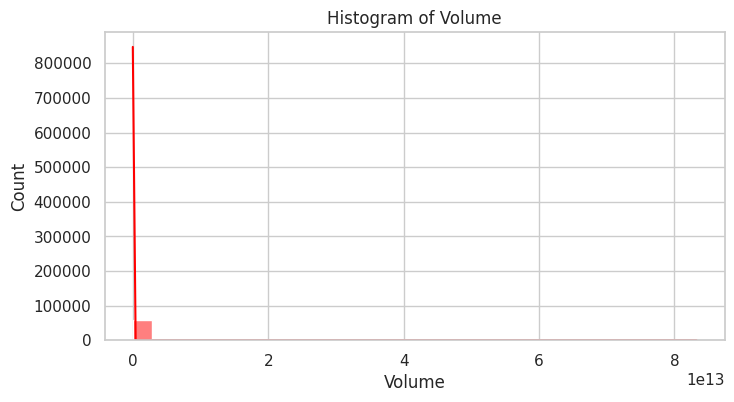

In [25]:
# Histograms for numerical features

sns.set(style='whitegrid')
num_features = ['Open', 'High', 'Low', 'Close', 'Volume']
cat_features = ['ticker','name']


for col in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(coin_df[col], kde=True, bins=30, color='red')
    plt.title(f'Histogram of {col}')
    plt.show()


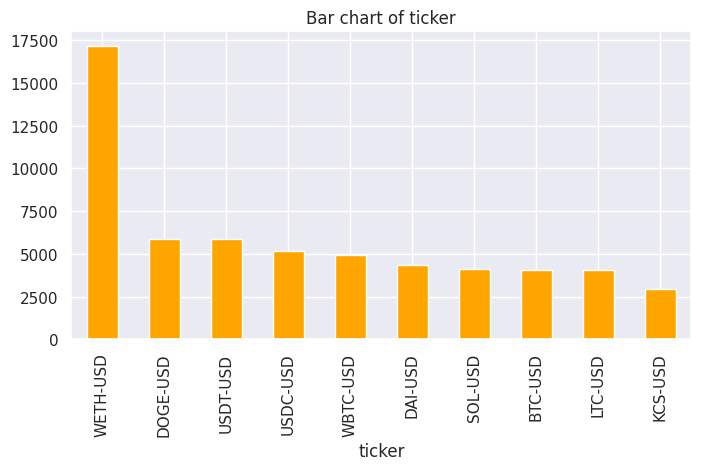

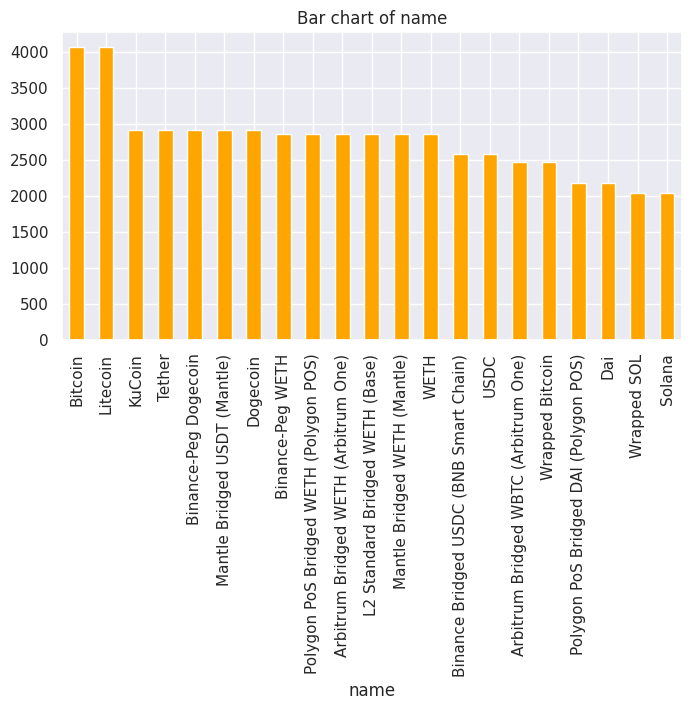

In [24]:
#Categorical features bar chart
for col in cat_features:
    plt.figure(figsize=(8,4))
    coin_df[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Bar chart of {col}')
    plt.show()

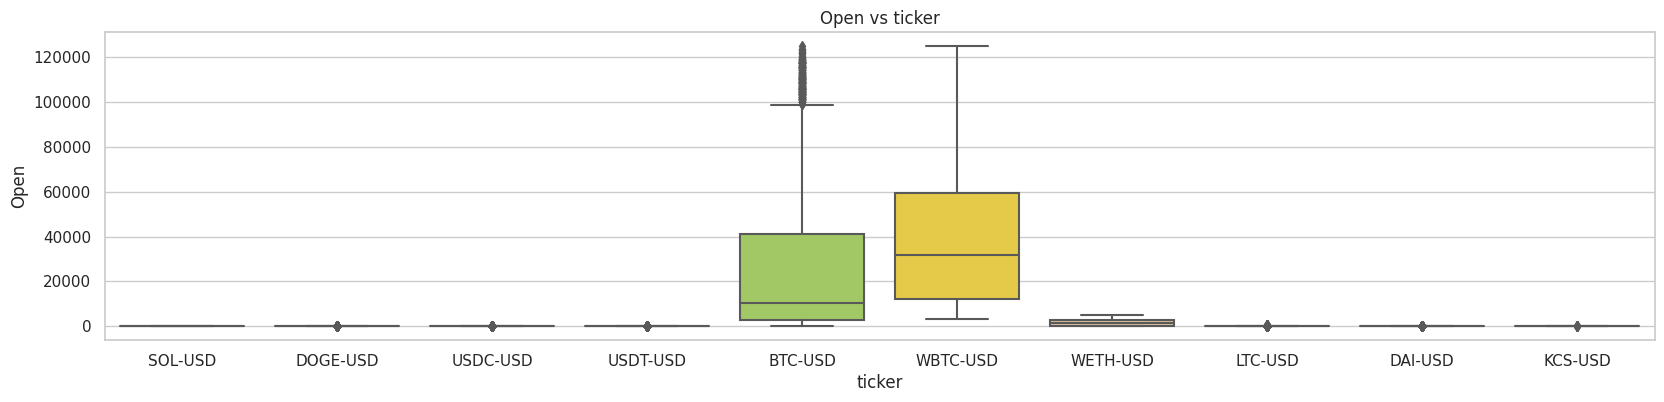

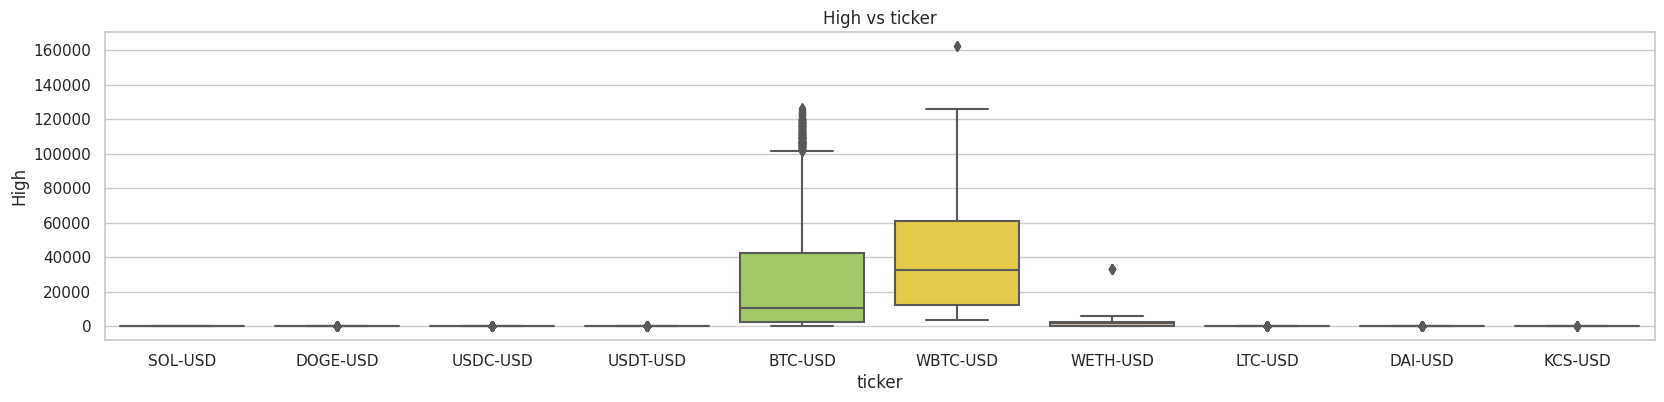

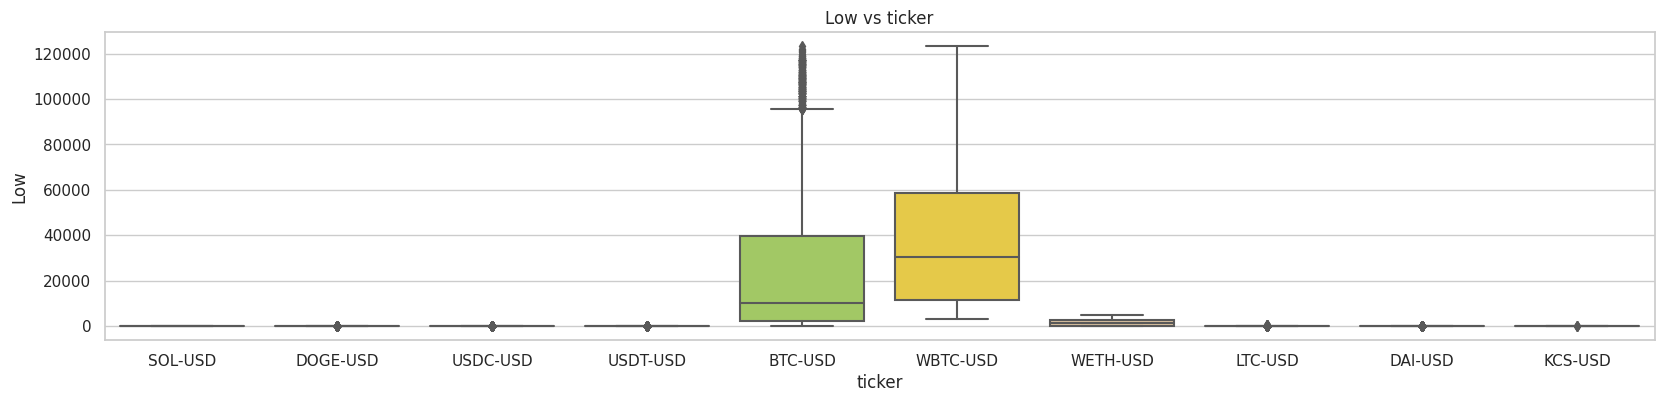

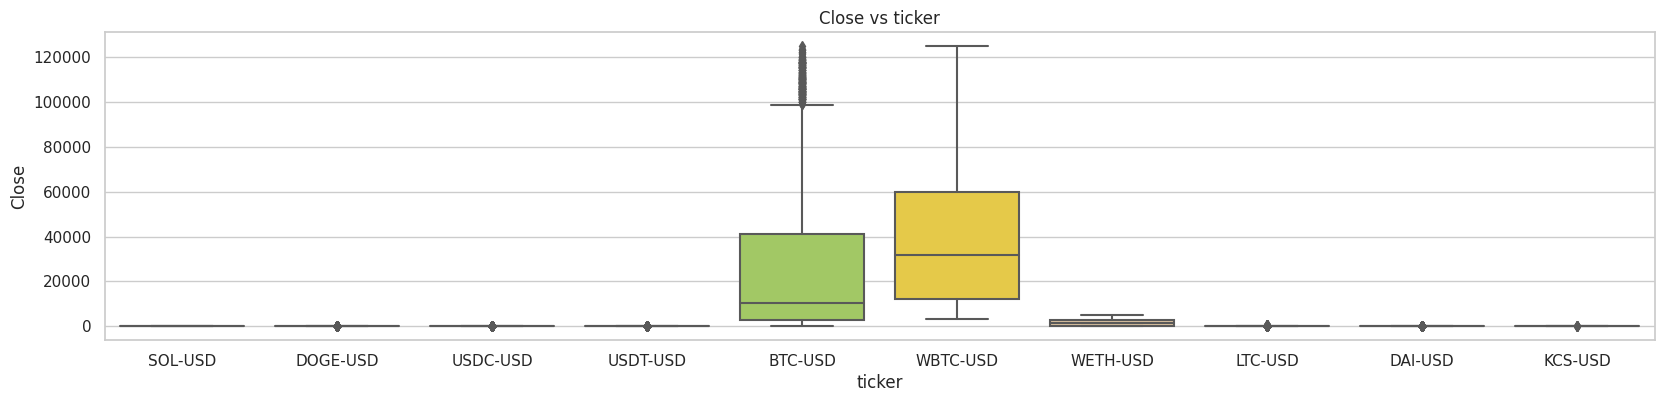

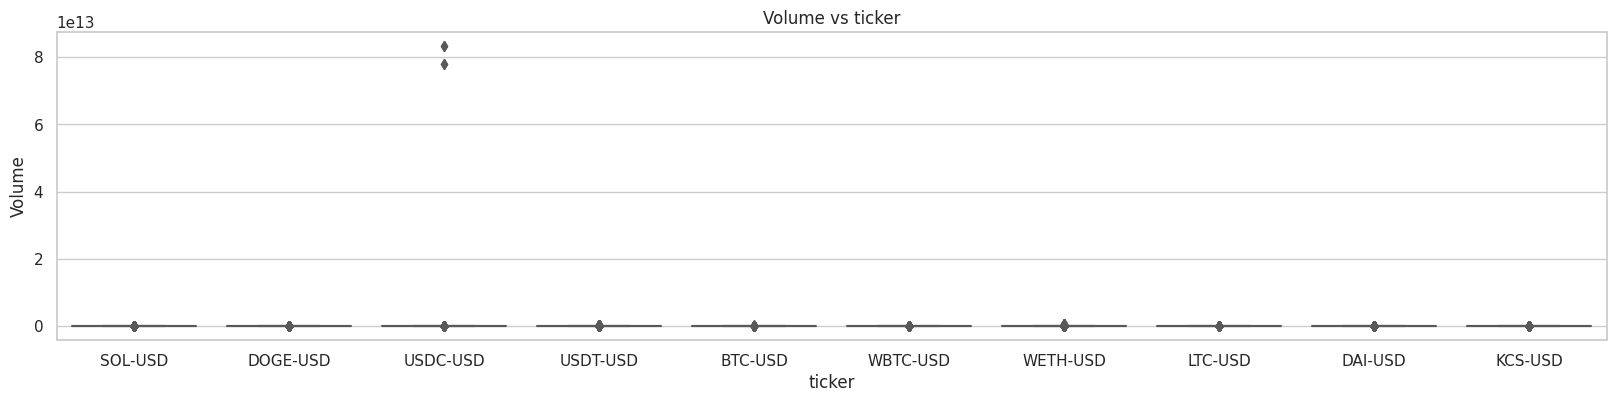

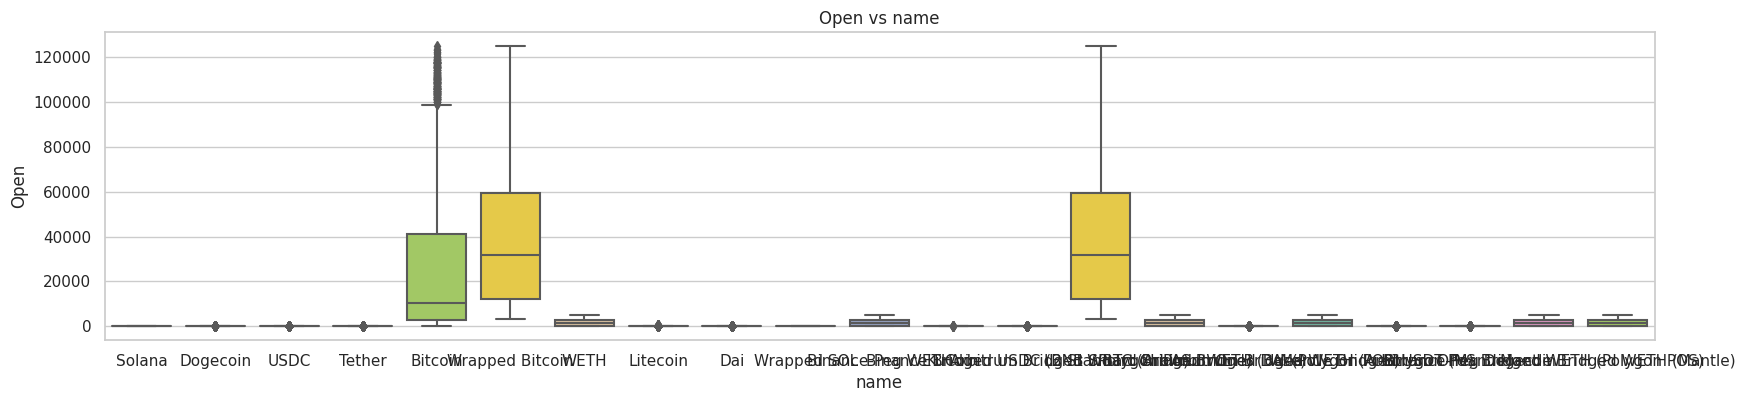

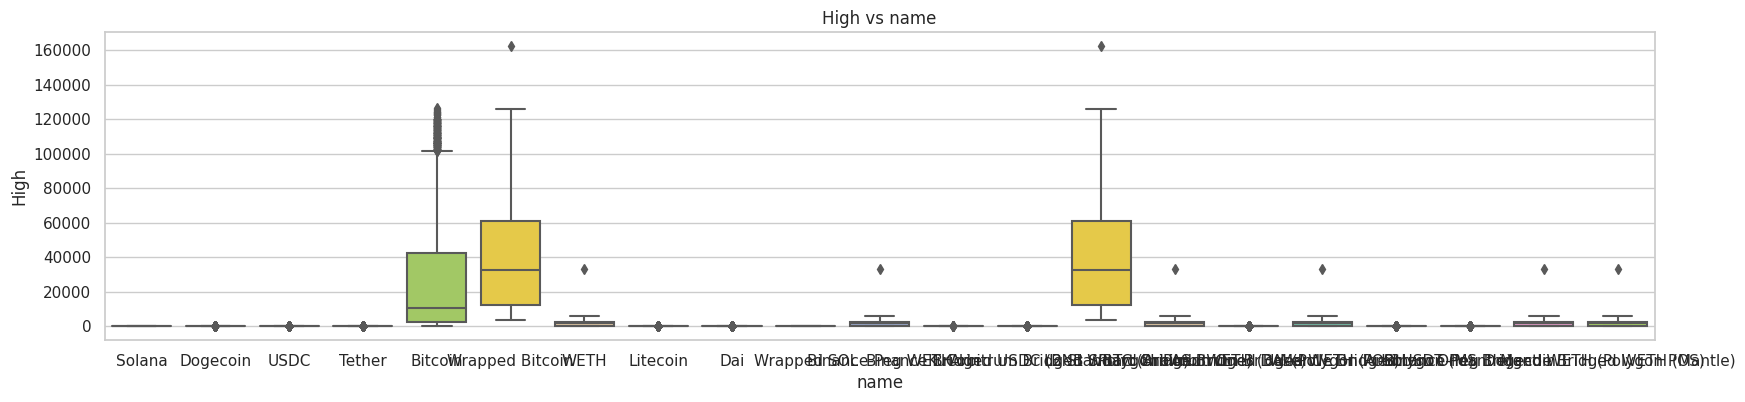

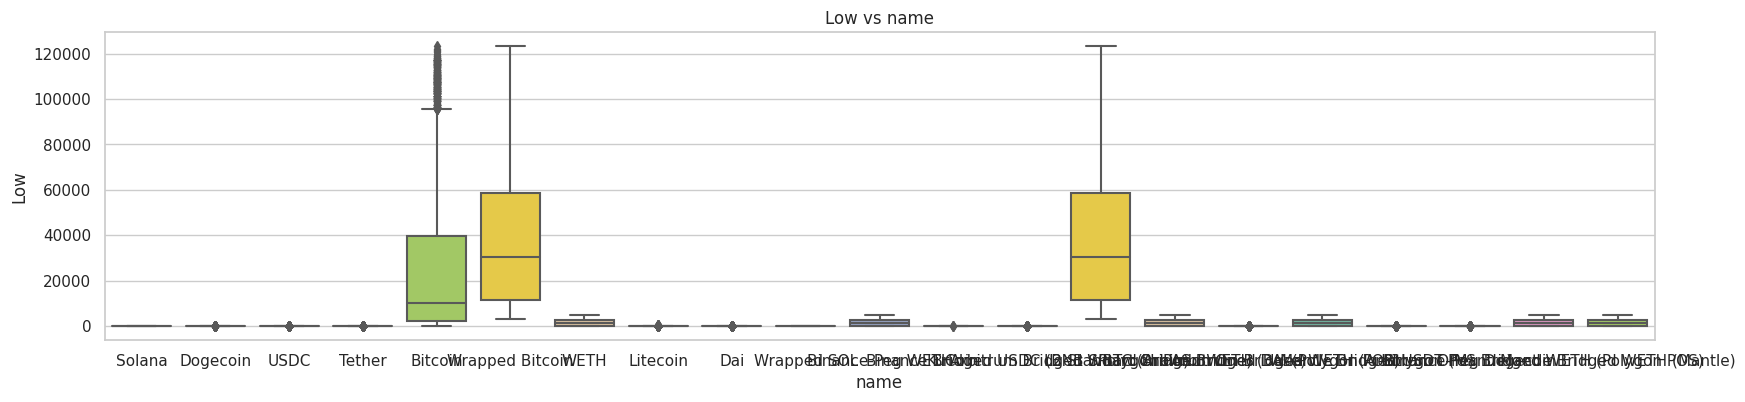

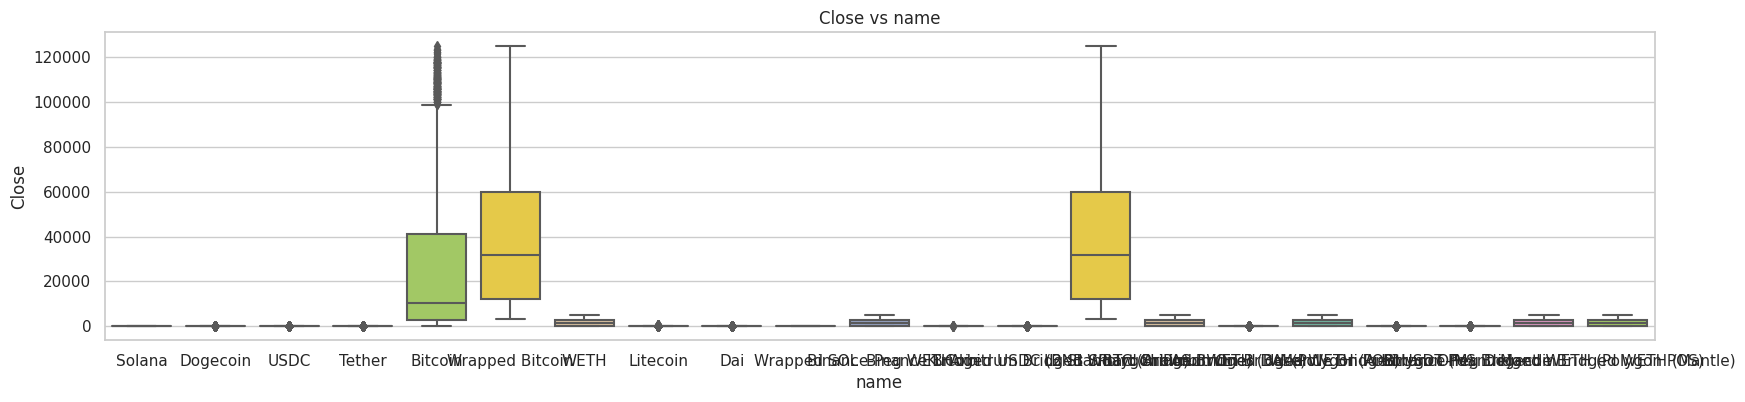

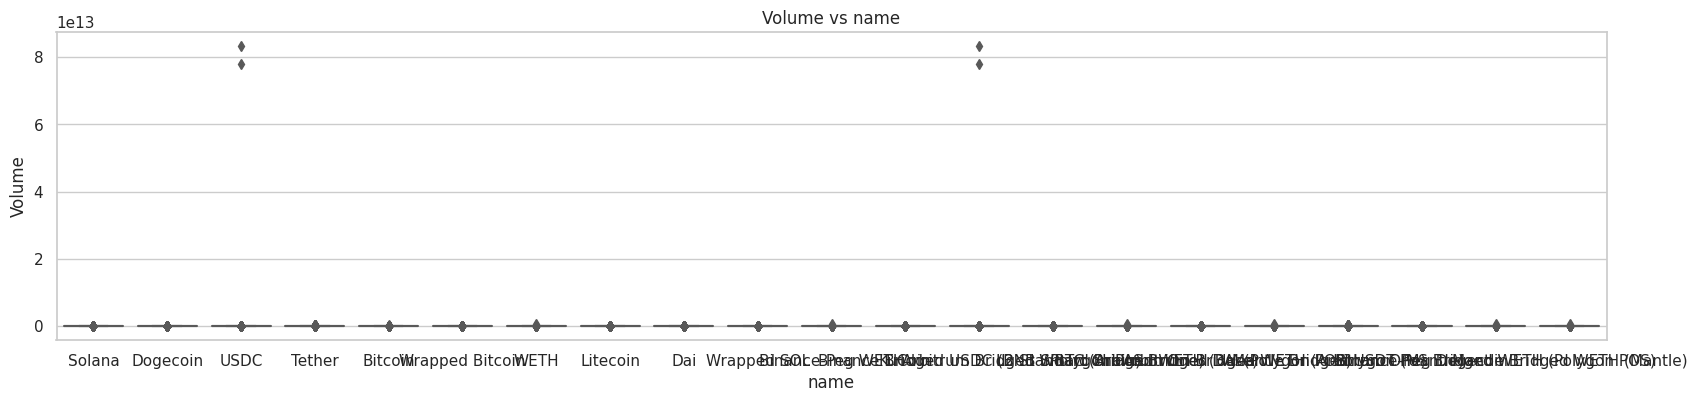

In [30]:
#Categorical vs Numerical plots
for cat in cat_features:
    for num in num_features:
        plt.figure(figsize=(20,4))
        sns.boxplot(x=cat, y=num, data=coin_df, palette='Set2')
        plt.title(f'{num} vs {cat}')
        plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

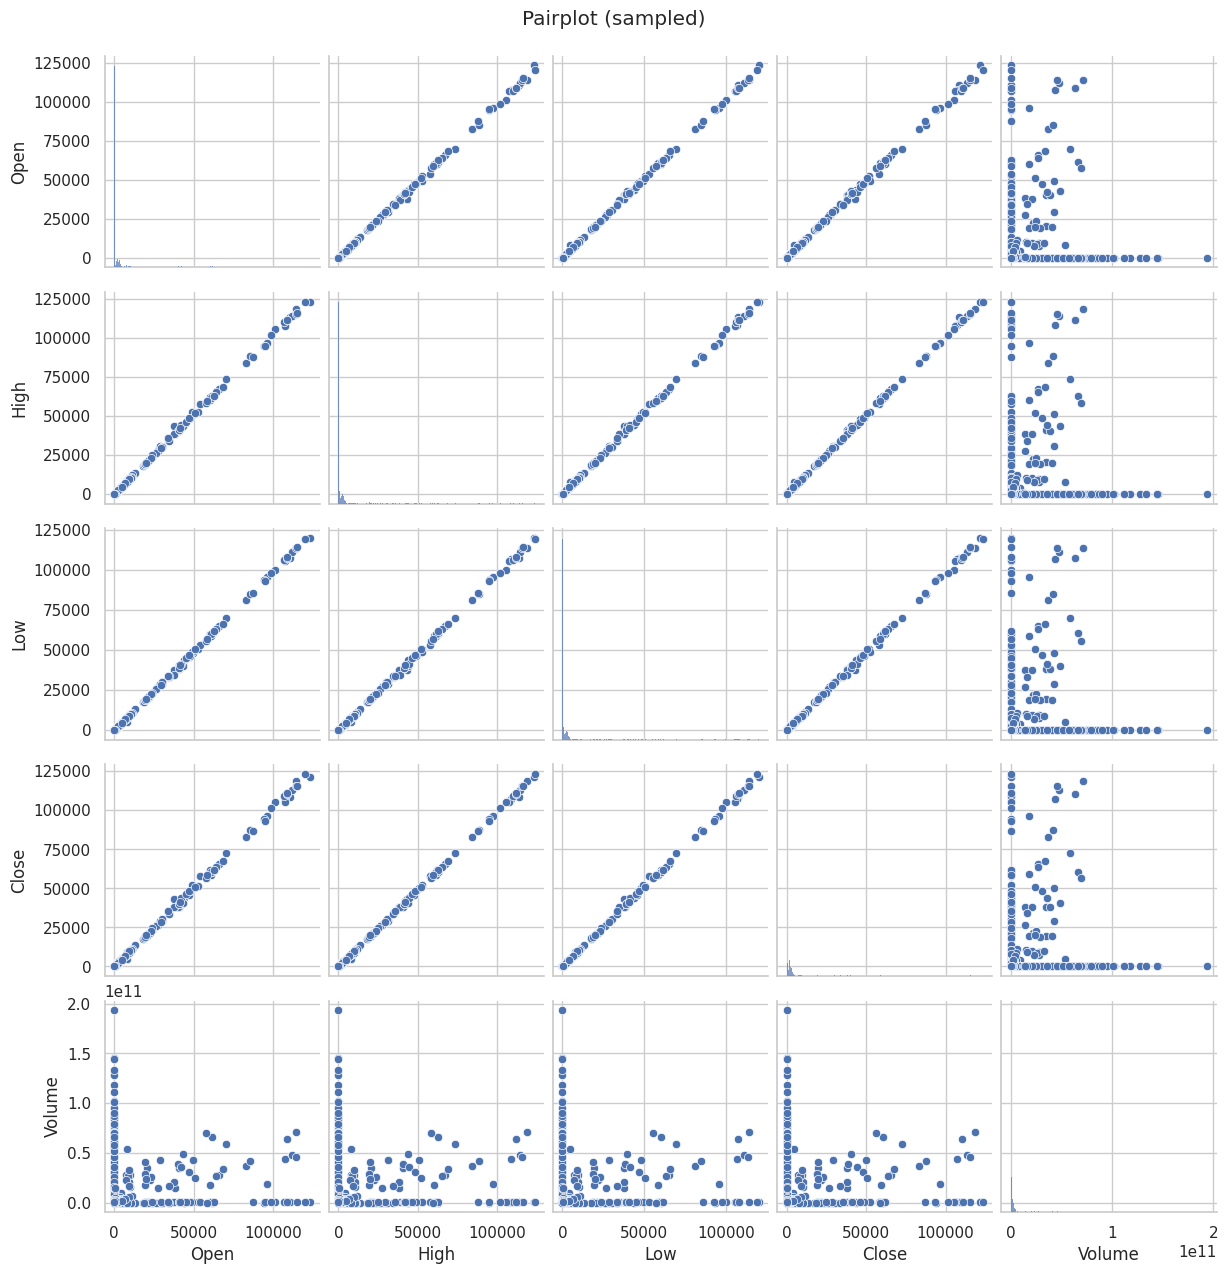

In [31]:
#Pairplot for numerical vs numerical



pair_cols = num_features 
sample_df = coin_df[pair_cols].dropna().sample(n=min(1000, len(df)), random_state=42)
sns.pairplot(sample_df)
plt.suptitle("Pairplot (sampled)", y=1.02)
plt.show()


In [32]:
#Missing data handling(not required)
print(coin_df.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
ticker    0
name      0
dtype: int64


In [33]:
coin_df.describe()


,Open,High,Low,Close,Volume
count,58551.000000,58551.000000,58551.000000,58551.000000,5.855100e+04
mean,5791.810859,5915.006306,5671.540661,5796.910949,1.324836e+10
std,17606.720154,17928.480845,17293.520922,17619.816954,6.668266e+11
min,0.001046,0.001210,0.000000,0.001038,0.000000e+00
25%,1.000122,1.001140,0.999483,1.000125,6.562491e+07
50%,88.190399,91.094902,84.834015,88.108047,6.174069e+08
75%,1966.581421,2029.452881,1913.826294,1967.198608,2.670473e+09
max,124827.132812,162188.250000,123230.890625,124828.453125,8.325207e+13


In [ ]:
# Aggregate to weekly frequency (W) to reduce data points
df_resampled = coin_df.groupby('ticker').resample('W').agg({
    'Open': 'mean',
    'High': 'max',
    'Low': 'min',
    'Close': 'mean',
    'Volume': 'sum'
}).reset_index()

metrics_to_plot = ['Open', 'High', 'Low', 'Close']

# Melt the downsampled DataFrame to long format
df_long_resampled = df_resampled.melt(
    id_vars=['Date', 'ticker'],
    value_vars=metrics_to_plot,
    var_name='metric',
    value_name='price'
)



for metric in metrics_to_plot:
    # Filter the long DataFrame for the current metric
    df_single_metric = df_long_resampled[df_long_resampled['metric'] == metric]
    
    #  facet plot (figure) for this specific metric
    g = sns.relplot(
        data=df_single_metric,
        x='Date',
        y='price',
        kind='line',
        col='ticker',
        col_wrap=2,
        height=4,
        aspect=1.5,
        facet_kws={'sharey': False} 
    )
    
    # Set titles for the figure and subplots
    g.figure.suptitle(f'{metric} Prices for Top 10 Tickers (Weekly Average)', y=1.02)
    g.set_titles("Ticker: {col_name}")
    g.set_ylabels(f'{metric} Price')
    plt.show()

In [ ]:
# tried mplfinance ohlc plot but it didnt work on my current setup. so switched to manual plotting in sns 
colors = ['blue', 'green', 'red', 'purple'] # custom colors

for ticker_name in top_ten_list:
    # Filter the resampled DataFrame for the current ticker
    df_single_ticker = df_resampled[df_resampled['ticker'] == ticker_name].copy()
    
    # Create a figure with a single row and four columns (axes)
    fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=False)
    
    # Use zip to loop through metrics, colors, and axes simultaneously
    for metric, color, ax in zip(metrics_to_plot, colors, axes):
        sns.lineplot(
            data=df_single_ticker,
            x='Date',
            y=metric,
            color=color,
            ax=ax
        )
        
        # Set the title for each subplot
        ax.set_title(f'{metric} Price', fontsize=12)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.grid(True)
        
    # Set a single, overarching title for the entire figure
    fig.suptitle(f'Price Metrics for Ticker: {ticker_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

**OBSERVATIONS**
* seems like 2 types of series:
    -   Stable, liquid assets (like BTC-USD, DCR-USD). smooth continuous curves
    -   Volatile, potentially stuck assets (ones with jagged, gappy plots).

In [36]:
features = ['Open', 'High', 'Low']
target = 'Close'

X = coin_df[features]
y = coin_df[target]

X.shape, y.shape

((58551, 3), (58551,))

In [37]:
#Standardization and Model Split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

numerical_transformer = StandardScaler() # for Z-score standardization

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer,features),
    ],
)
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle= False)
print(f"Training set shape: X = {X_train.shape} , y = {y_train.shape}")
print(f"Testing set shape: X = {X_test.shape}, y = {y_test.shape}")

Training set shape: X = (46840, 3) , y = (46840,)
Testing set shape: X = (11711, 3), y = (11711,)


In [38]:
#Outlier Removal

import numpy as np

window_size = 7 # last 7 days
threshold = 4.0 

X_train_imputed = X_train.copy()
outlier_count = 0


for column in X_train.columns:
    # 1. Calculate Rolling Z-Score
    rolling_mean = X_train[column].rolling(window=window_size).mean().shift(1)
    rolling_std = X_train[column].rolling(window=window_size).std().shift(1)
    rolling_z_score = (X_train[column] - rolling_mean) / rolling_std
    outlier_condition = rolling_z_score.abs() > threshold
    
    outlier_count += outlier_condition.sum()
    
    # 2. Mark Outliers as NaN
    # We use .mask() to replace values where the condition is True
    X_train_imputed[column] = X_train_imputed[column].mask(outlier_condition)

# 3. Interpolate the NaN values (Linear method is usually best for price data)
X_train_interpolated = X_train_imputed.interpolate(method='linear', limit_direction='both')

# Assign the final cleaned data
X_train_cleaned = X_train_interpolated
y_train_cleaned = y_train

print(f"Total outliers imputed: {outlier_count}")
print(f"Cleaned X_train size: {X_train_cleaned.shape[0]}") # Size remains the same

Total outliers imputed: 11729
Cleaned X_train size: 46840


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [39]:
#ML models Comparison
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Apply preprocessor 
X_train_processed = preprocessor.fit_transform(X_train_cleaned) # Fits and transforms the training data
X_test_transformed  = preprocessor.transform(X_test) # Transforms the test data using the same mean and std dev calculated from the training data

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf'),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, objective='reg:squarederror')
}

results = []

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_transformed)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })



Model Performance Comparison:

                      Model         MAE         RMSE        R²
1             Random Forest    2.629678    80.159818  0.996091
4                   XGBoost   17.844471   112.583108  0.992290
0         Linear Regression   35.365069   128.321894  0.989983
2         Gradient Boosting   33.505856   191.586575  0.977672
3  Support Vector Regressor  617.227166  1052.066253  0.326704


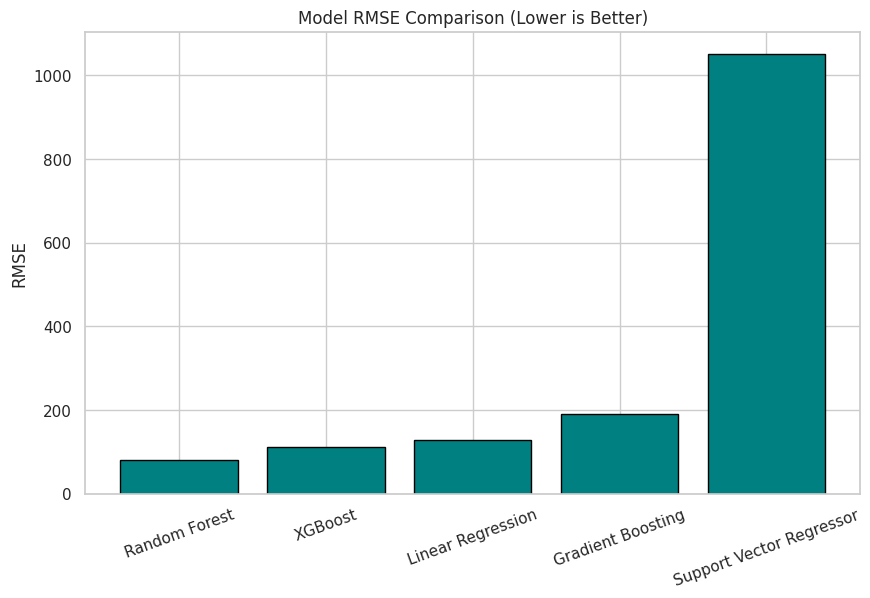


 Best performing model: Random Forest


In [41]:
#Model Comparison Table
results_df = pd.DataFrame(results).sort_values(by='RMSE', ascending=True)
print("\nModel Performance Comparison:\n")
print(results_df)

plt.figure(figsize=(10,6))
plt.bar(results_df['Model'], results_df['RMSE'], color='teal', edgecolor='black')
plt.title("Model RMSE Comparison (Lower is Better)")
plt.ylabel("RMSE")
plt.xticks(rotation=20)
plt.show()

best_model_name = results_df.iloc[0]['Model']
print(f"\n Best performing model: {best_model_name}")

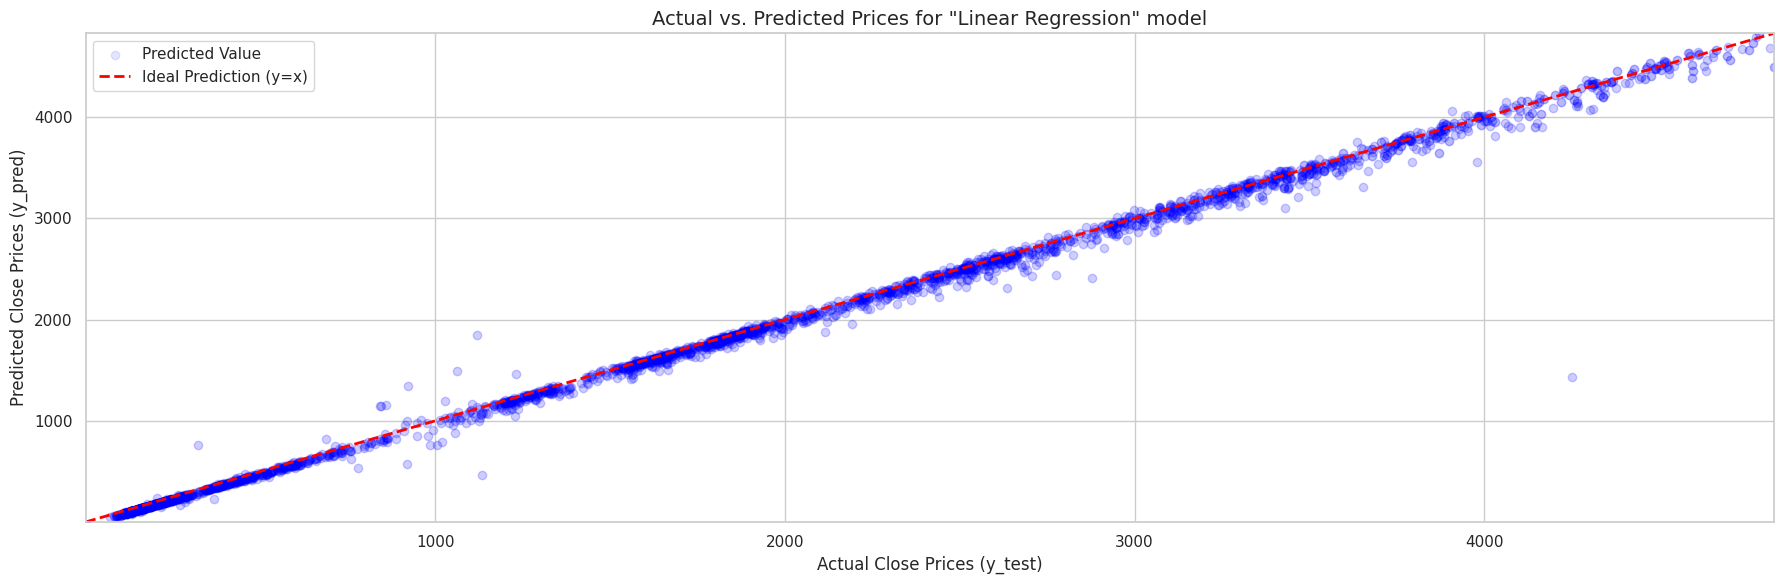

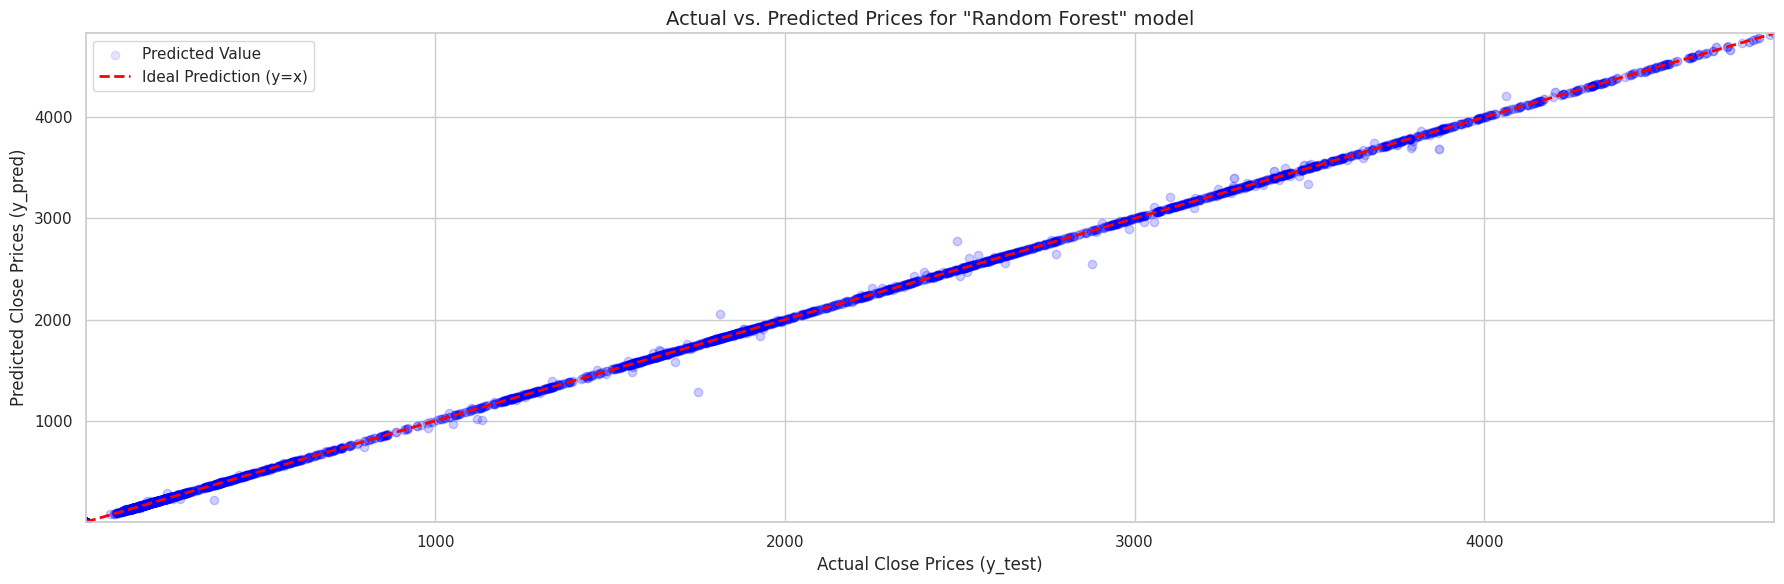

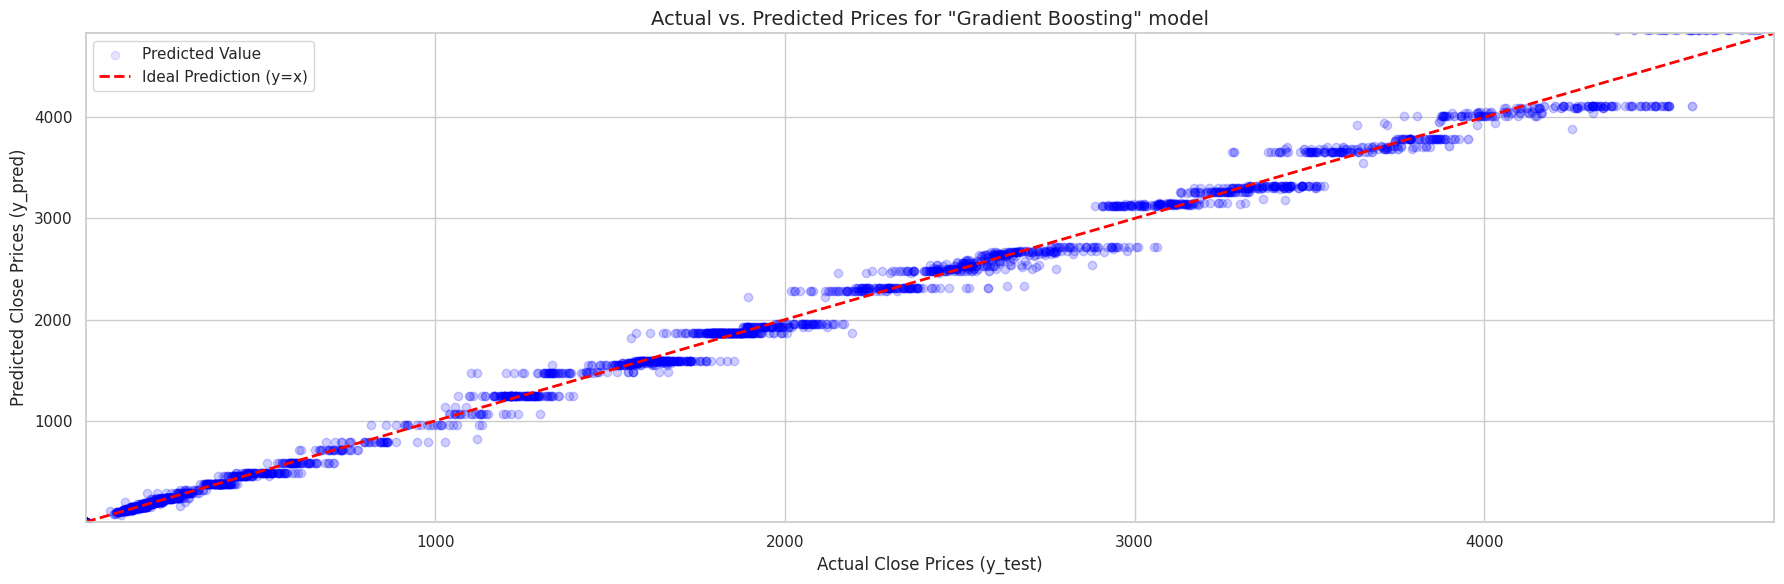

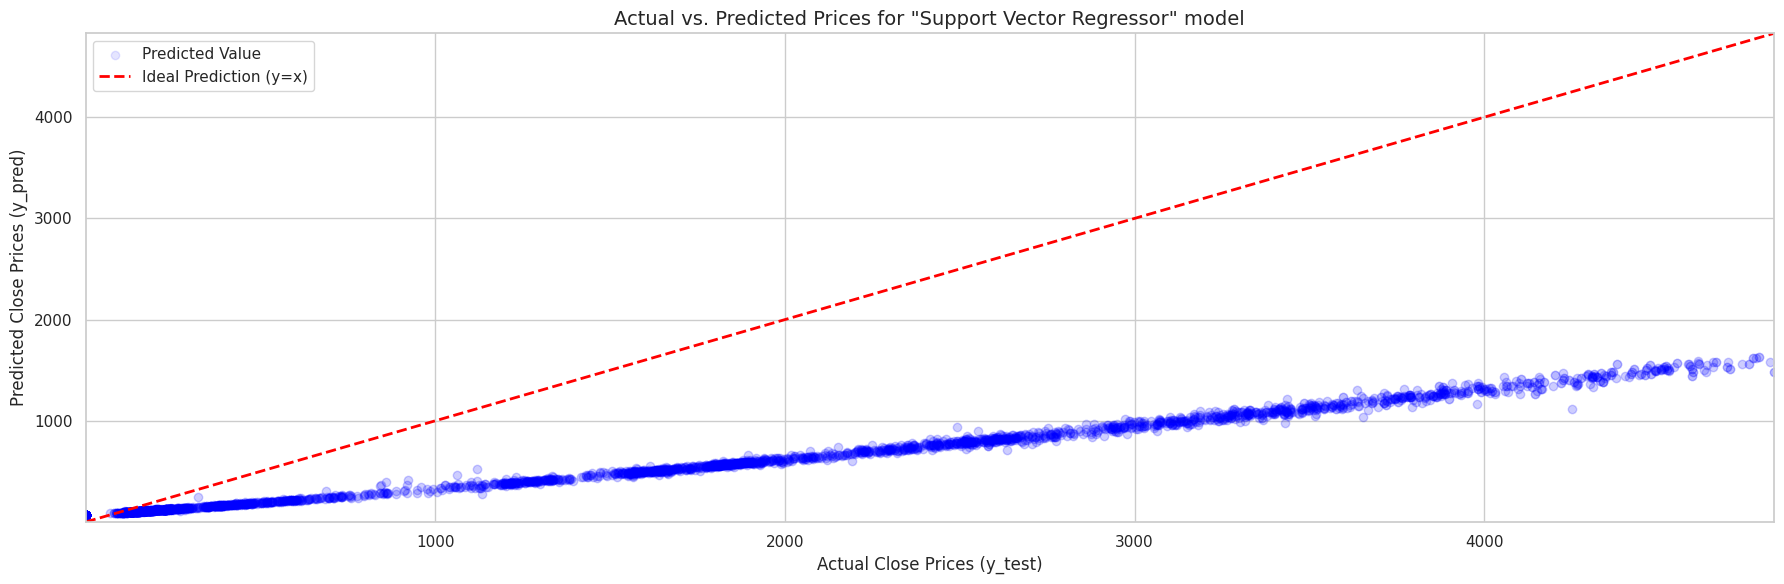

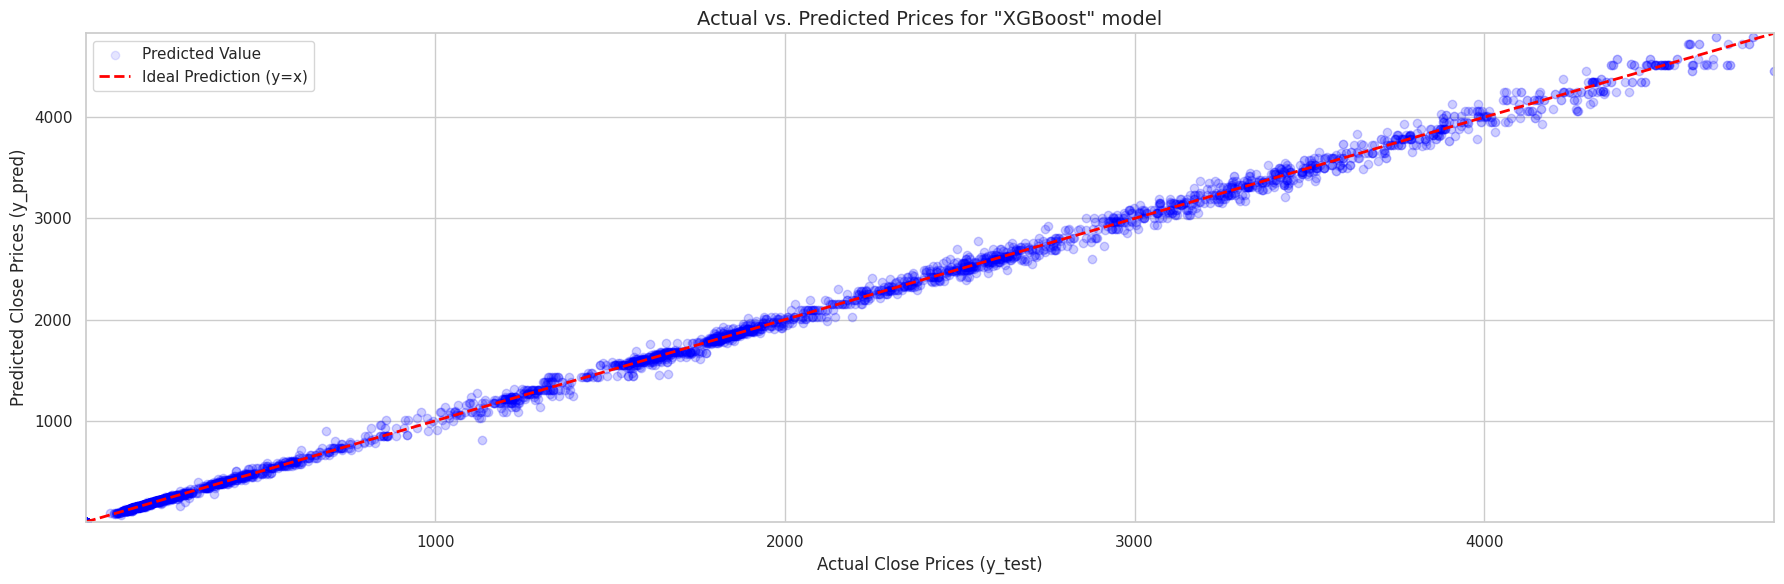

In [42]:
min_val = y_test.min()
max_val = y_test.max()

for name, model in models.items():
    
    # 1. Train and Predict
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_transformed)
    plt.figure(figsize=(18, 6))
    plt.scatter(y_test, y_pred, alpha=0.1, color='blue', label='Predicted Value')
        
    # Diagonal Line (The X=Y line)
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Prediction (y=x)')

    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)

    plt.xlabel('Actual Close Prices (y_test)')
    plt.ylabel('Predicted Close Prices (y_pred)')
    plt.title(f'Actual vs. Predicted Prices for "{name}" model', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()